#### 라이브러리 및 옵션 설정

In [2]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('font', family ='AppleGothic') #맥용 폰트 설정

#mpl.rc('font', family ='Malgun Gothic') #윈도우용 폰트 설정

plt.rcParams['axes.unicode_minus'] = False #마이너스 숫자가 잘 나오도록 설정

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina') #선명하게 그리는 옵션

/var/folders/_b/znjp14gd02d8lg63thqc7bm40000gn/T/ipykernel_17568/1369781442.py:15: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina') #선명하게 그리는 옵션


#### 데이터 불러오기

In [3]:
df1 = pd.read_csv('chapter2_data.csv')
df1.head()

,id,유형,경로,날짜,결제유형,제품명,계약금액,상태,연체,연체기록,연결계좌,해약여부,나이,마일리지
0,66292722,렌탈,서비스 방문,2019-12-24,CMS,A,96900,계약확정,1,있음,신한은행,정상,64.0,2386.0
1,66784411,렌탈,홈쇼핑/방송,2019-12-24,카드이체,A,81900,계약확정,0,없음,외환카드,정상,38.0,1487.0
2,66766058,렌탈,일반,2019-11-07,CMS,C,102900,계약확정,0,없음,국민은행,정상,27.0,1342.0
3,66775111,렌탈,홈쇼핑/방송,2019-12-01,카드이체,A,96900,계약확정,0,없음,롯데카드,정상,24.0,1212.0
4,66784935,렌탈,서비스 방문,2019-12-26,CMS,A,105900,계약확정,0,없음,국민은행,정상,51.0,2124.0


#### 데이터 파악하기

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28555 entries, 0 to 28554
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28555 non-null  int64  
 1   유형      28555 non-null  object 
 2   경로      28555 non-null  object 
 3   날짜      28555 non-null  object 
 4   결제유형    28555 non-null  object 
 5   제품명     28555 non-null  object 
 6   계약금액    28555 non-null  int64  
 7   상태      28555 non-null  object 
 8   연체      28555 non-null  int64  
 9   연체기록    28555 non-null  object 
 10  연결계좌    28555 non-null  object 
 11  해약여부    28555 non-null  object 
 12  나이      28555 non-null  float64
 13  마일리지    28555 non-null  float64
dtypes: float64(2), int64(3), object(9)
memory usage: 3.1+ MB


In [5]:
df1.describe()

,id,계약금액,연체,나이,마일리지
count,2.855500e+04,28555.000000,28555.000000,28555.000000,28555.000000
mean,6.664544e+07,94956.571529,0.151042,46.583225,1967.358221
std,9.879706e+05,12591.330111,1.110066,13.397094,434.926055
min,2.573206e+07,55200.000000,0.000000,20.000000,877.000000
25%,6.665981e+07,87900.000000,0.000000,37.000000,1646.000000
50%,6.676788e+07,96900.000000,0.000000,46.000000,1947.000000
75%,6.678124e+07,98400.000000,0.000000,56.000000,2264.000000
max,6.696986e+07,215700.000000,15.000000,90.000000,3485.000000


In [6]:
df1.describe(include = 'object')

,유형,경로,날짜,결제유형,제품명,상태,연체기록,연결계좌,해약여부
count,28555,28555,28555,28555,28555,28555,28555,28555,28555
unique,2,18,101,2,6,4,2,42,2
top,렌탈,서비스 방문,2019-10-25,CMS,A,계약확정,없음,롯데카드,정상
freq,27128,8836,494,18557,21262,28047,27505,6142,28074


---

#### 다변수

#### Barplot
- [범주형] 컬럼 + [연속형] 컬럼 함께 살펴볼 때

옵션 : estimator, x/y축 변경, order + [hue]

/var/folders/_b/znjp14gd02d8lg63thqc7bm40000gn/T/ipykernel_17568/2614922530.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = df1, x = '제품명', y = '계약금액', ci = None, estimator = np.median, order = ['A','B','C','D','E','F'], hue = '유형' )
/Users/limjongjun/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/limjongjun/.local/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<Axes: xlabel='제품명', ylabel='계약금액'>

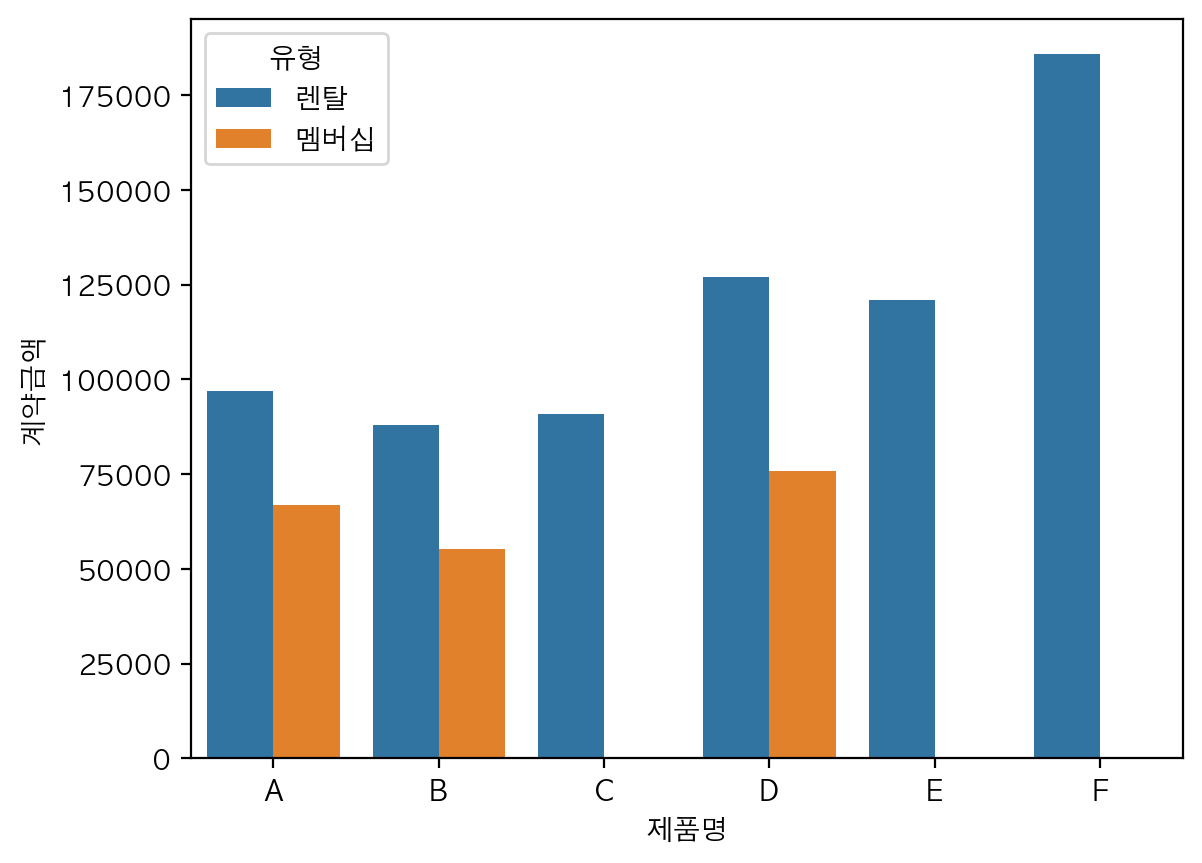

In [10]:
sns.barplot(data = df1, x = '제품명', y = '계약금액', ci = None, estimator = np.median, order = ['A','B','C','D','E','F'], hue = '유형' )

#estimator의 default 값은 mean
#ci 옵션을 통해 신뢰구간 표시 유무 설정
#order 옵션을 통해 순서 지정

#### Lineplot
- [시간 순석적 의미] 컬럼 + [연속형] 컬럼 함께 살펴볼 때

옵션 : estimator + [hue]

<Axes: xlabel='날짜', ylabel='계약금액'>

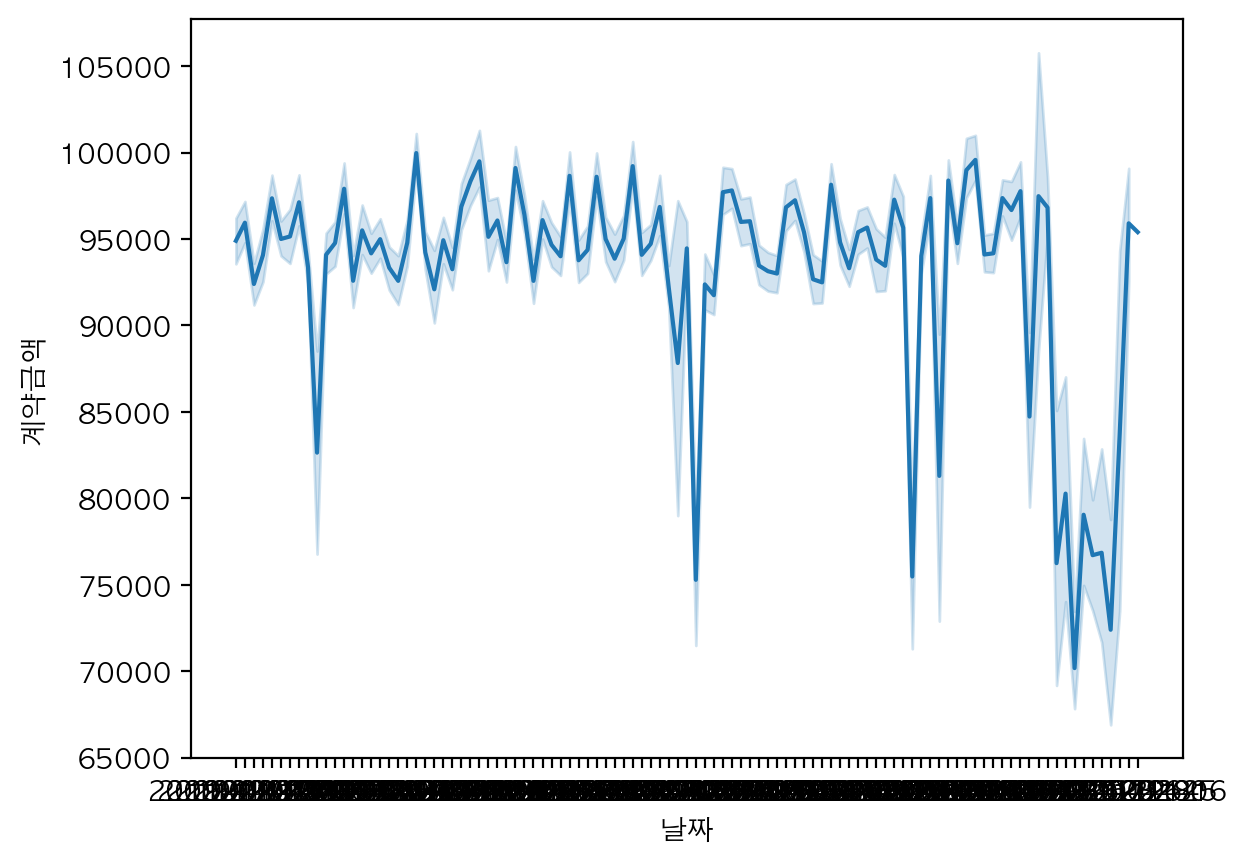

In [11]:
sns.lineplot(data = df1, x = '날짜', y = '계약금액') #'날짜' 필드를 날짜 형식으로 전처리 필요

In [13]:
df1['날짜(Date)'] = pd.to_datetime(df1['날짜'])
df1.head()

,id,유형,경로,날짜,결제유형,제품명,계약금액,상태,연체,연체기록,연결계좌,해약여부,나이,마일리지,날짜(Date)
0,66292722,렌탈,서비스 방문,2019-12-24,CMS,A,96900,계약확정,1,있음,신한은행,정상,64.0,2386.0,2019-12-24
1,66784411,렌탈,홈쇼핑/방송,2019-12-24,카드이체,A,81900,계약확정,0,없음,외환카드,정상,38.0,1487.0,2019-12-24
2,66766058,렌탈,일반,2019-11-07,CMS,C,102900,계약확정,0,없음,국민은행,정상,27.0,1342.0,2019-11-07
3,66775111,렌탈,홈쇼핑/방송,2019-12-01,카드이체,A,96900,계약확정,0,없음,롯데카드,정상,24.0,1212.0,2019-12-01
4,66784935,렌탈,서비스 방문,2019-12-26,CMS,A,105900,계약확정,0,없음,국민은행,정상,51.0,2124.0,2019-12-26


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28555 entries, 0 to 28554
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        28555 non-null  int64         
 1   유형        28555 non-null  object        
 2   경로        28555 non-null  object        
 3   날짜        28555 non-null  object        
 4   결제유형      28555 non-null  object        
 5   제품명       28555 non-null  object        
 6   계약금액      28555 non-null  int64         
 7   상태        28555 non-null  object        
 8   연체        28555 non-null  int64         
 9   연체기록      28555 non-null  object        
 10  연결계좌      28555 non-null  object        
 11  해약여부      28555 non-null  object        
 12  나이        28555 non-null  float64       
 13  마일리지      28555 non-null  float64       
 14  날짜(Date)  28555 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(9)
memory usage: 3.3+ MB


<Axes: xlabel='날짜(Date)', ylabel='계약금액'>

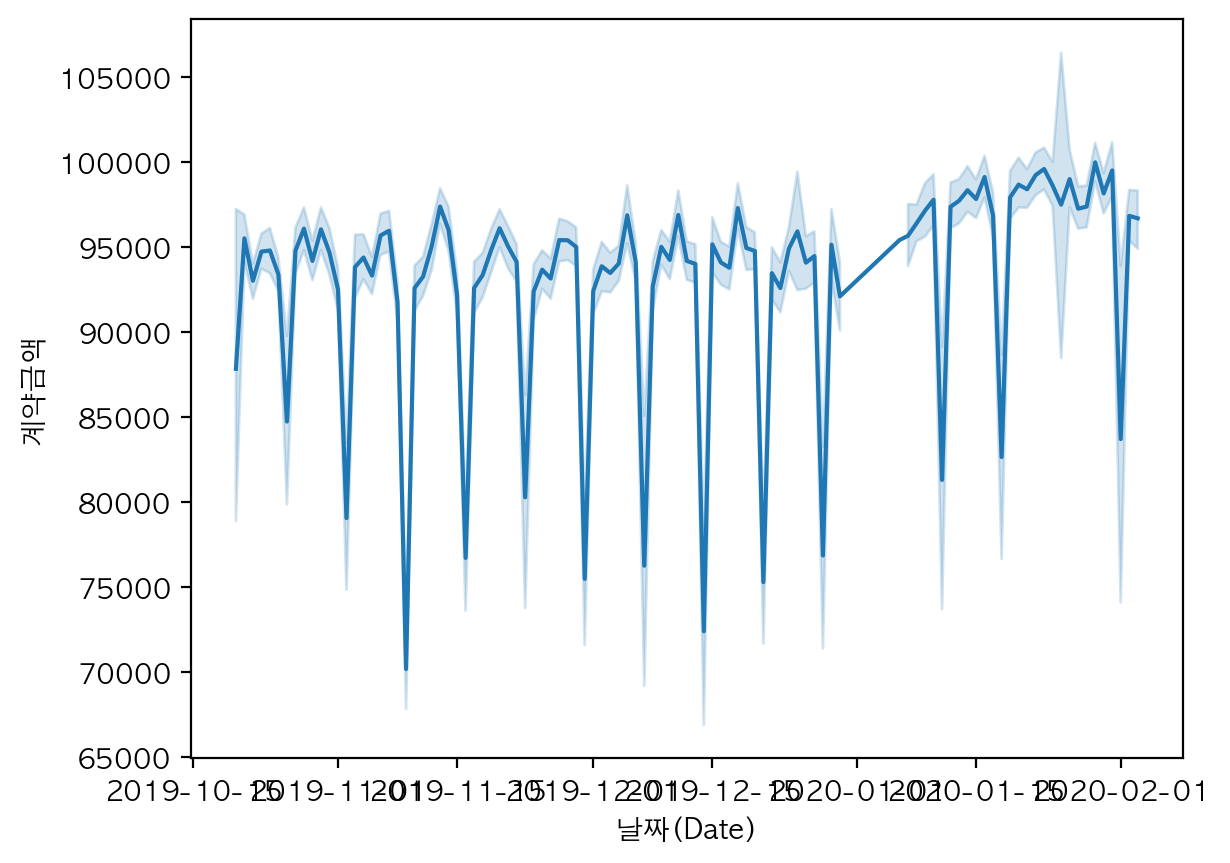

In [15]:
sns.lineplot(data = df1, x = '날짜(Date)', y = '계약금액') #'날짜' 필드 전처리 필요

In [16]:
#년도
df1['Year'] = df1['날짜(Date)'].dt.year

#분기
df1['Quarter'] = df1['날짜(Date)'].dt.quarter

#월
df1['Month'] = df1['날짜(Date)'].dt.month

#주번호
df1['isoweek'] = df1['날짜(Date)'].dt.isocalendar().week

#요일
df1['dayofweek'] = df1['날짜(Date)'].dt.dayofweek #0이 월요일, 6:일요일

In [17]:
df1.head()

,id,유형,경로,날짜,결제유형,제품명,계약금액,상태,연체,연체기록,연결계좌,해약여부,나이,마일리지,날짜(Date),Year,Quarter,Month,isoweek,dayofweek
0,66292722,렌탈,서비스 방문,2019-12-24,CMS,A,96900,계약확정,1,있음,신한은행,정상,64.0,2386.0,2019-12-24,2019,4,12,52,1
1,66784411,렌탈,홈쇼핑/방송,2019-12-24,카드이체,A,81900,계약확정,0,없음,외환카드,정상,38.0,1487.0,2019-12-24,2019,4,12,52,1
2,66766058,렌탈,일반,2019-11-07,CMS,C,102900,계약확정,0,없음,국민은행,정상,27.0,1342.0,2019-11-07,2019,4,11,45,3
3,66775111,렌탈,홈쇼핑/방송,2019-12-01,카드이체,A,96900,계약확정,0,없음,롯데카드,정상,24.0,1212.0,2019-12-01,2019,4,12,48,6
4,66784935,렌탈,서비스 방문,2019-12-26,CMS,A,105900,계약확정,0,없음,국민은행,정상,51.0,2124.0,2019-12-26,2019,4,12,52,3
